In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler


# from sklearn.model_selection import train_test_split, StratifiedKFold
# from sklearn.linear_model import LogisticRegression
# from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
# from sklearn.tree import DecisionTreeClassifier
# from sklearn.metrics import roc_curve, roc_auc_score
# import matplotlib.pyplot as plt

In [2]:
df= pd.read_csv('bank_with_missing.csv')

print("Data preview:")
df.head()

Data preview:


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58.0,management,married,tertiary,no,2143.0,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44.0,technician,single,secondary,no,29.0,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33.0,entrepreneur,married,secondary,no,2.0,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47.0,blue-collar,married,unknown,no,1506.0,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,NaN,unknown,single,unknown,no,1.0,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [3]:
df.shape

(45211, 17)

In [4]:
# Obsv: here the data shape shows that we have 45211 rows and 17 coloumns

In [5]:
df.isna().sum()

age          100
job          120
marital        0
education      0
default        0
balance       80
housing        0
loan           0
contact        0
day            0
month          0
duration       0
campaign       0
pdays          0
previous       0
poutcome       0
y              0
dtype: int64

In [6]:
# Observation: the age column has 100 Null values, job has 120, balance has 80 while others have zero null values

In [7]:
age_mean=df["age"].mean()

age_mean

40.937398860588324

In [8]:
# fill missing value with MEAN in age column
df['age'] = df['age'].fillna(age_mean)

In [9]:
mode_job=df['job'].mode()[0]
mode_job

'blue-collar'

In [10]:
df['job'] = df['job'].fillna(mode_job)

In [11]:
df= df.dropna(subset=['balance'])

In [12]:
df.isna().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [13]:
df.shape

(45131, 17)

In [14]:
# Observation: we have converted the missing values in age column into mean, and missing values in job into mode, 
# we removed the NA values in balance and dropped them. 
# The shape of the data changed and the count of Null values also became zero for all

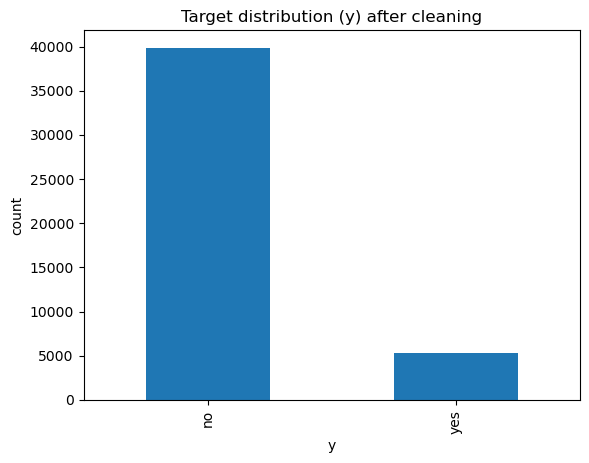

In [15]:
import matplotlib.pyplot as plt

plt.figure()
df['y'].value_counts().plot(kind='bar')
plt.title("Target distribution (y) after cleaning")
plt.xlabel("y")
plt.ylabel("count")
plt.show()

In [ ]:
# OBSERVATION: its shows the distribution of values of YES and NO in the target variable column.
# It is visible that the data is completely Imbalanced
# The count of NO id 8 times more than the count of Yes values

In [16]:
# ENCODING : converting categorial value into numeric value

label_encoders={}
for column in df.select_dtypes(include=['object']).columns:
    if column == 'y':
        label_encoders[column] = LabelEncoder()
        df[column] = label_encoders[column].fit_transform(df[column])

In [17]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58.000000,management,married,tertiary,no,2143.0,yes,no,unknown,5,may,261,1,-1,0,unknown,0
1,44.000000,technician,single,secondary,no,29.0,yes,no,unknown,5,may,151,1,-1,0,unknown,0
2,33.000000,entrepreneur,married,secondary,no,2.0,yes,yes,unknown,5,may,76,1,-1,0,unknown,0
3,47.000000,blue-collar,married,unknown,no,1506.0,yes,no,unknown,5,may,92,1,-1,0,unknown,0
4,40.937399,unknown,single,unknown,no,1.0,no,no,unknown,5,may,198,1,-1,0,unknown,0


In [ ]:
# OBSERVATION: Here we have converted all the YES and NO values in the target variable column into numeric values 1 and 0

In [18]:
X_temp = df.drop(['y'],axis=1)  # 1 means column
Y = df['y']

In [ ]:
# Observation: Here the Column Y (Target variable) is droped and the data is seperated into Features and target variable

In [19]:
X_temp.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,58.000000,management,married,tertiary,no,2143.0,yes,no,unknown,5,may,261,1,-1,0,unknown
1,44.000000,technician,single,secondary,no,29.0,yes,no,unknown,5,may,151,1,-1,0,unknown
2,33.000000,entrepreneur,married,secondary,no,2.0,yes,yes,unknown,5,may,76,1,-1,0,unknown
3,47.000000,blue-collar,married,unknown,no,1506.0,yes,no,unknown,5,may,92,1,-1,0,unknown
4,40.937399,unknown,single,unknown,no,1.0,no,no,unknown,5,may,198,1,-1,0,unknown


In [20]:
Y.value_counts()

y
0    39856
1     5275
Name: count, dtype: int64

In [ ]:
# OBSERVATION: We can the count of values 0 and 1 which are 39856 and 5275 respectively, Almost 8 times difference

In [21]:
X = pd.get_dummies(X_temp,drop_first=True)
X = pd.get_dummies(X).astype(int)

In [22]:
X.head()

,age,balance,day,duration,campaign,pdays,previous,job_blue-collar,job_entrepreneur,job_housemaid,...,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_other,poutcome_success,poutcome_unknown
0,58,2143,5,261,1,-1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
1,44,29,5,151,1,-1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
2,33,2,5,76,1,-1,0,0,1,0,...,0,0,0,1,0,0,0,0,0,1
3,47,1506,5,92,1,-1,0,1,0,0,...,0,0,0,1,0,0,0,0,0,1
4,40,1,5,198,1,-1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1


In [ ]:
# OBSERVATION: By using getdummies aka one-hot encoding, all the categorical variables in each row is converted into 
# numeric variables and Each category becomes its own column with 0/1 values.

In [23]:
X.shape

(45131, 42)

In [24]:
from sklearn.model_selection import train_test_split, StratifiedKFold

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state= 42, stratify=Y)  # only adding stratify=Y


In [25]:
X_train.shape

(36104, 42)

In [26]:
Y_train.shape

(36104,)

In [27]:
X_test.shape

(9027, 42)

In [28]:
Y_test.shape

(9027,)

In [ ]:
# OBSERVATION: Using Stratified Train-Test-Split, the date is being divided into 80% training and 20% testing,
#  ensuring class balance in Y is preserved using stratify=Y.

In [29]:
# Standardizing Feature
scaler= StandardScaler()
X = scaler.fit_transform(X)

print('Dataset shape:', df.shape)
print('Class Distribution: \n',Y.value_counts(normalize=True))

Dataset shape: (45131, 17)
Class Distribution: 
 y
0    0.883118
1    0.116882
Name: proportion, dtype: float64


In [ ]:
# OBSERVATION: The above code standardizes all features in X to have mean 0 and standard deviation 1,
# then prints the normalized class distribution of Y.

In [30]:
scale = StandardScaler()

X_train = scale.fit_transform(X_train)
X_test = scale.transform(X_test)

In [31]:
X_train[0:5]

array([[-1.30952447,  0.27528573,  0.02306888, -0.49994933, -0.56994964,
         2.82781954,  0.17556126,  1.88231188, -0.18203527, -0.16729899,
        -0.51110767, -0.23000374, -0.18929916, -0.31775253, -0.14345356,
        -0.44755543, -0.17162324, -0.0781206 ,  0.81110785, -0.62758999,
         0.96885395, -0.64176064, -0.20528746, -0.13635316,  0.89416524,
        -0.43811475, -0.26090397, -0.63445475, -0.40070496, -0.07078544,
        -0.24718845, -0.17851375, -0.42506417, -0.36390359, -0.1028617 ,
        -0.66272854, -0.30874243, -0.12911399, -0.11322612,  4.92776959,
        -0.18421639, -2.12435937],
       [ 0.10585839,  0.37362345,  1.22249107, -0.29205621, -0.24582366,
        -0.41001747, -0.24125097, -0.53126159, -0.18203527, -0.16729899,
         1.95653492, -0.23000374, -0.18929916, -0.31775253, -0.14345356,
        -0.44755543, -0.17162324, -0.0781206 ,  0.81110785, -0.62758999,
        -1.03214731,  1.55821336, -0.20528746, -0.13635316, -1.11836152,
        -0.43811

In [32]:
from sklearn.linear_model import LogisticRegression

classifier = LogisticRegression() #classification is an instance(obj)
classifier.fit(X_train, Y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [90]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay

model = LogisticRegression(max_iter=1000)
model.fit(X_train,Y_train)
Y_pred = model.predict(X_test)

print("Train-Test Split Results:")
print("Accuracy:", accuracy_score(Y_test, Y_pred))

print(classification_report(Y_test,Y_pred, digits=3))

print("Confusion Matrix:\n", confusion_matrix(Y_test, Y_pred))

Train-Test Split Results:
Accuracy: 0.9008529965658579
              precision    recall  f1-score   support

           0      0.921     0.971     0.945      7972
           1      0.627     0.373     0.468      1055

    accuracy                          0.901      9027
   macro avg      0.774     0.672     0.707      9027
weighted avg      0.887     0.901     0.890      9027

Confusion Matrix:
 [[7738  234]
 [ 661  394]]


In [ ]:
# OBSERVATION: The code trains the model with up to 1000 iterations, 
# Accuracy for Logistic Regression Model is 0.90
# and a detailed classification report shows precision, recall, f1-score, support for each class of this Logistic Model

In [96]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

Y_pred_pro = model.predict_proba(X_test)[:, 1]

auc_score = roc_auc_score(Y_test, Y_pred_pro)
print(f"AUC Score: {auc_score:.3f}")

AUC Score: 0.905


In [ ]:
# OBSERVATION: AUC score is 0.90

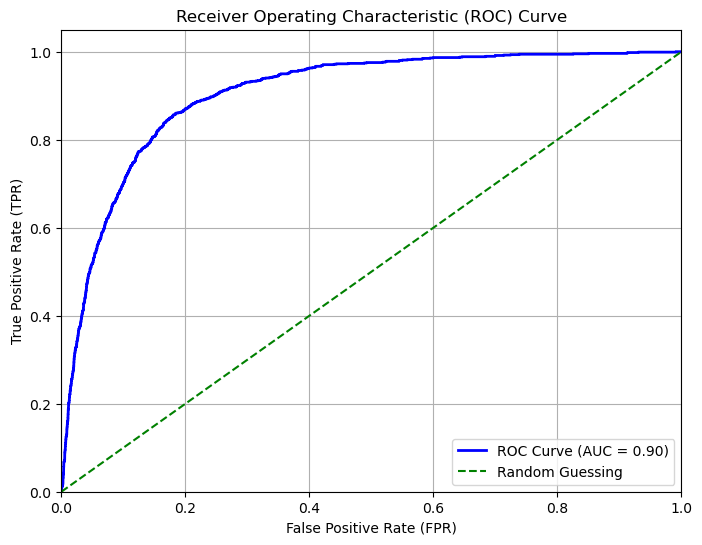

In [104]:
# Get predicted probabilities for the positive class (ATTORNEY = 1)
Y_pred_pro = classifier.predict_proba(X_test)[:, 1]  # Probabilities for class 1 , : stands for all

# Calculate ROC curve metrics
fpr, tpr, thresholds = roc_curve(Y_test, Y_pred_pro)

# Plot ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, 
         label=f'ROC Curve (AUC = {auc_score:.2f})')
plt.plot([0, 1], [0, 1], color='green', linestyle='--', label='Random Guessing')

# Customize plot
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')

plt.title('Receiver Operating Characteristic (ROC) Curve')

plt.legend(loc="lower right")

plt.grid(True)

# Show plot
plt.show()

In [34]:
# import DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier

In [35]:
clf_gini=DecisionTreeClassifier(criterion='gini', max_depth=5, random_state=0)

In [36]:
clf_gini.fit(X_train,Y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,5
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [37]:
Y_pred_gini = clf_gini.predict(X_test)

In [38]:
print('Model accuracy with gini index: {0:0.4f}'. format(accuracy_score(Y_test,Y_pred_gini)))

Model accuracy with gini index: 0.8995


In [39]:
print(classification_report(Y_test,Y_pred_gini, digits=3))

              precision    recall  f1-score   support

           0      0.920     0.970     0.945      7972
           1      0.619     0.364     0.459      1055

    accuracy                          0.900      9027
   macro avg      0.770     0.667     0.702      9027
weighted avg      0.885     0.900     0.888      9027



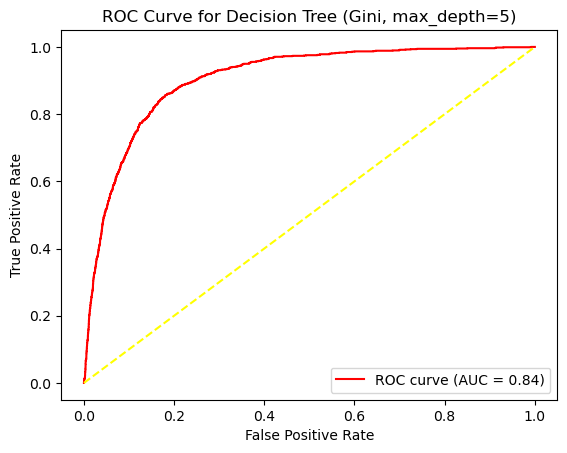

In [112]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Predict probabilities for the positive class
Y_probs = clf_gini.predict_proba(X_test)[:, 1]

# Compute ROC curve metrics
fpr_t, tpr_t, thresholds = roc_curve(Y_test, Y_probs)

# Calculate the AUC score
#roc_auc = auc(fpr, tpr)
auc_t = roc_auc_score(Y_test, Y_probs)
# Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, color='red', label=f'ROC curve (AUC = {auc_t:.2f})')
plt.plot([0, 1], [0, 1], color='yellow', linestyle='--')  # Chance line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Decision Tree (Gini, max_depth=5)')
plt.legend(loc='lower right')
plt.show()

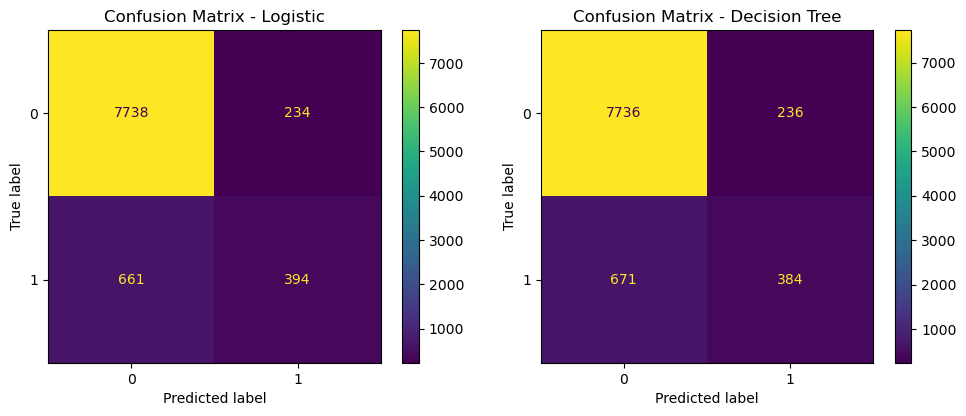

In [114]:
# Confusion Matrices For Both Logistic and Decision Tree
fig, axs = plt.subplots(1, 2, figsize=(10,4))

ConfusionMatrixDisplay.from_predictions(Y_test, Y_pred, ax=axs[0])

axs[0].set_title("Confusion Matrix - Logistic")

ConfusionMatrixDisplay.from_predictions(Y_test, Y_pred_gini, ax=axs[1])

axs[1].set_title("Confusion Matrix - Decision Tree")
plt.tight_layout()
plt.show()

In [116]:
# ROC Curves for both
fpr_log, tpr_log, _ = roc_curve(Y_test, Y_pred)
fpr_tree, tpr_tree, _ = roc_curve(Y_test, Y_pred_gini)
auc_log = roc_auc_score(Y_test, Y_pred)
auc_tree = roc_auc_score(Y_test, Y_pred_gini)

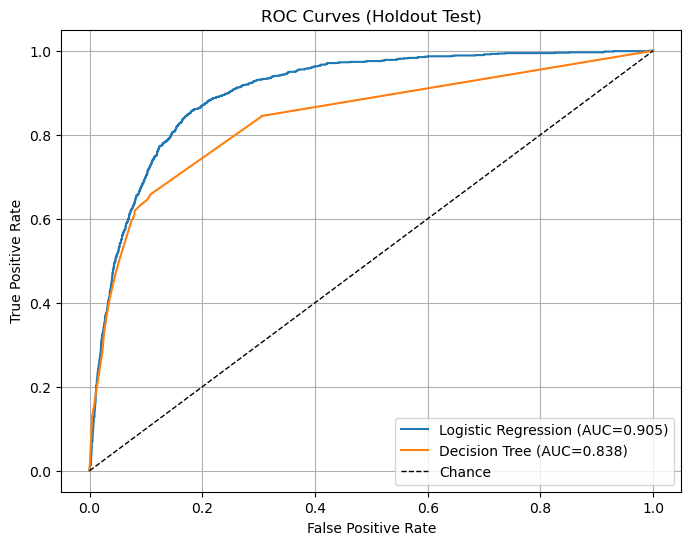

In [120]:
# Plot both ROC curves
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'Logistic Regression (AUC={auc_score:.3f})')
plt.plot(fpr_t, tpr_t, label=f'Decision Tree (AUC={auc_t:.3f})')
plt.plot([0,1],[0,1],'k--',linewidth=1,label='Chance')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves (Holdout Test)')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()